**Homework Assignment #2**
<br>Please see matlab comments `% comments`

**1. Machine Epsilon**
(see attachment)

In [1]:
10^-3 %alpha estimate decimal 32bit
2^-8 %alpha estimate binary 32 bit
10^-12 %alpha estimate decimal 64bit
2^-37 %alpha estimate binary 64bit

ans =
                     0.001
ans =
                0.00390625
ans =
                     1e-12
ans =
      7.27595761418343e-12


**2. Taylor Series Errors**
<br>**a.** Approximate $f(x) = \sin(x)$ using Taylor Series.</br>
<br>Let: $$x \in [0,\frac{\pi}{2}]$$ and $$E_n(x) = \frac{(x-c)^{n+1}}{(n+1)!}$$ </br>
<br>How many terms of a Taylor polynomial for  $f(x) =\sin(x)$  are required to ensure  $E_n(x) < 2\times10^{-8}$?
<br>See Attachment for $f(n) = E_n(x)(n)$

In [2]:
format long
N = [0:20]; %Randomly chosen N

Err_Prox = [(pi/2).^(N+1)]./factorial(N+1); %lagrange with upper bound computed

Err_loc = find(abs(Err_Prox) > 2*10^(-8)); %finding what N makes    Err_Prox < 2e-8

N_threshold = max(Err_loc) %Index starts at 1 where N=0, so the TermCount is the same as the Location in Err_Loc 

N_threshold =
    13


**2b. Write a function that takes two arguments a numberd** $x$ **and integer** $n>0$ **which approximates the Taylor series for** $f(x) = sin(x)$
<br>
<br>Save function `my_sin(x,n)` as **my_sin.m** in working directory.
```matlab

function [y,sin_tay] = my_sin(x,n) 
%Expanding around c = 0, Maclaurin Series, with index from 0 to n
    for k = [0:n]
    sin_tay(k+1) = [(-1)^k * x^(2*k+1)]/factorial(2*k+1);
    y = sum(sin_tay);
    end
end
```

**2c. Experimentally verify (plotting)**

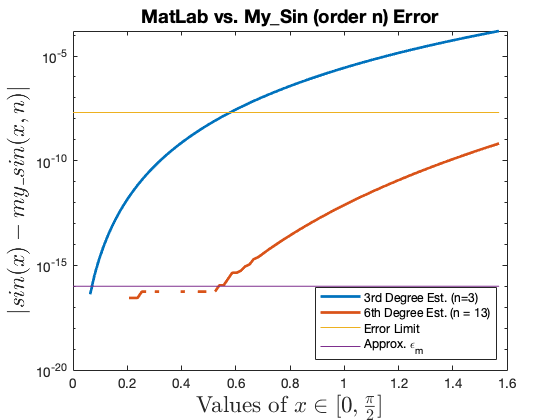

In [3]:
%plot inline
x = linspace(0,pi/2);
bound = 2*10^-8.*ones(1,100); %Max Error Asked For
mepsilon = 10^-16*ones(1,100); %Machine Epsilonish

%Computing Errors for n = 3 and n = 13
eps1 = []; eps2 = []; 
for t = x
    eps1 = [eps1, abs(sin(t)-my_sin(t,3))];
    eps2 = [eps2, abs(sin(t)-my_sin(t,6))];
end

%\Plots
semilogy(x,eps1,'LineWidth',2)
hold on
semilogy(x,eps2,'LineWidth',2)
semilogy(x,bound,x,mepsilon)

%Formatting Stuff
xlabel('Values of {$x \in [0,\frac{\pi}{2}]$}','Interpreter','latex','FontSize',17)
ylabel('$|sin(x)-my\_sin(x,n)|$','Interpreter','latex','FontSize',17)
title('MatLab vs. My\_Sin (order n) Error','FontSize',14)
legend({'3rd Degree Est. (n=3)','6th Degree Est. (n = 13)', 'Error Limit','Approx. \epsilon_m'}...
,'Location','southeast')


**Part C Notes:**
<br>It seems that the n=13 value (14 terms total, zeros inclusive) gives an approximation of $\pi$ within the
error tolerance required. n=3 (4 terms total, zeros NOT-inclusive) does not meet the error tolerance requirements in
the specified x interval.
<br>This is comparing 3-term Maclaurin polynomial to the 6-term Maclaurin polynomial centered at x = 0. I did this to achieve the same degree in X^n for Sin(x) and Error(x)(n).

**3. Cancellation, Precision and Loss of Precision.**
<br>**a.** Use Loss of Precision Theorem: $10^{-p} \leq 1 - \frac{x_0}{y_0} \leq 10^{-q}$, (decimal) to compute accurate digits. 
<br>**b.** Compute the "true" root using `roots ()`
<br>**c.** Use $x = \frac{-b + \sqrt{b^2 - 4ac}}{2a}$ to compute root.
<br>**d.** Modify quadratic formula with its conjugate and compute root.

In [4]:
format compact
format long e
a = 0.5; b = 1000; c = 5*10^-7; %declare variables
fprintf('*Part 3a: Scratch Work\n')

%3a Scratch Work
x0 = b; y0 = sqrt(b^2 - 4*a*c);
loss = 1-(y0/x0)
%Test Guess
(10^-13 < loss) & (loss < 10^-12)


fprintf('\n\n*Part 3b: Using Roots Function\n')
x1 = roots([.5,1000,5*10^-7]); max(x1), %3b Using Roots Function

fprintf('\n\n*Part 3c: Using Quadratic Form\n')
x2 = (-b + sqrt(b^2-4*a*c))/(2*a),  %3c Using Quadratic Form

fprintf('\n\n*Part 3d: Using Conjugate * Quadratic Form\n')
x3 = -2*c/[sqrt(b^2-4*a*c)+b], %3d Using Conjugate

*Part 3a: Scratch Work
loss =
     5.000444502911705e-13
ans =
  logical
   1


*Part 3b: Using Roots Function
ans =
    -5.000000000001249e-10


*Part 3c: Using Quadratic Form
x2 =
    -4.999947122996673e-10


*Part 3d: Using Conjugate * Quadratic Form
x3 =
    -5.000000000001249e-10


**Part C notes**
<br> We see that in MatLab we can succesfully calculate without a significant loss in precision: $$1-\frac{b}{\sqrt{b^2 - 4ac}}$$ From that calculation we can deduce the loss of significant digits implied by the Loss of Precision Theorem. The calculated loss is at most 13 and at least 12 significant decimal digits.

This answer seems to line up with the Part 3C Quadratic Formula  vs  Part 3B  Roots function answer, since the answers differ by at least 1x10^(-13)ish compare (-4999.94e^-13 and -5000.00e^-13). I think..... the spacing and counting decimals gets very wish washy very fast.... 